In [ ]:
# for basic operations
import numpy as np 

# Widen the display of python output
# This is done to avoid ellipsis appearing which restricts output view in row or column
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline


# for modeling 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import RepeatedKFold, train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import  KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM

# to avoid warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from collections import Counter

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML

In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/uci-secom.csv"

In [ ]:
data = pd.read_csv(path)

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop Time
    df = df.drop('Time', axis=1)
    
    # Drop columns with more than 25% missing values
    missing_value_columns = df.columns[df.isna().mean() >= 0.25]
    df = df.drop(missing_value_columns, axis=1)
    
    # Fill remaining missing values
    for column in df.columns:
        df[column] = df[column].fillna(df[column].mean())
    
    # Remove columns with only one value
    single_value_columns = [
        '5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190',
        '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236',
        '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263',
        '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328',
        '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380',
        '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414',
        '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498',
        '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515',
        '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'
    ]
    df = df.drop(single_value_columns, axis=1)
    
    # Give text labels to the training examples
    df['Pass/Fail'] = df['Pass/Fail'].replace({-1: "PASS", 1: "FAIL"})
    
    # Split df into X and y
    y = df['Pass/Fail']
    X = df.drop('Pass/Fail', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589
390,-0.349832,-0.784979,-0.702110,-0.837070,-0.062886,0.550891,0.079727,1.660382,0.575205,-2.431983,0.797085,0.540446,-0.414208,0.198770,-0.133839,0.138456,0.802962,-0.141989,0.406594,-1.944799,1.184600,0.517599,0.603531,-1.204280,-0.193823,-1.115491,-0.066524,0.840071,0.004572,1.897204,0.164009,-0.344928,-0.096793,-0.188004,0.096785,0.032469,-0.369733,-0.069760,0.472898,-0.307605,-0.641308,-1.534336,0.671991,-0.093710,-0.838657,-1.949541,-0.883044,-1.544120,0.092793,0.487526,-1.261347,0.718979,-1.222570,-0.618197,-0.304094,-0.859098,-0.504877,0.631671,-0.478489,-0.120276,-0.387213,0.125805,-0.043259,-0.672118,-0.250071,-0.364907,-0.030259,-0.174211,-1.024089,0.306111,0.281335,0.118571,-1.961859,0.171993,0.463144,-2.029889,0.341519,-0.721421,-0.857198,0.839935,-0.576545,-0.978286,0.729335,-1.363542,-0.232198,-1.609040,0.385890,1.750566,-2.107488,0.844019,0.634084,-1.826197,-1.069833,1.115710,-0.825519,1.347212,0.236377,1.751022,-1.039865,-0.152960,-0.076638,-0.793954,0.455772,0.712141,-0.202519,0.984641,-1.928707,-0.677087,0.546434,-0.271985,-0.317688,0.575953,-1.053141,0.223411,-0.619657,0.228101,-0.719128,-1.005788,-0.017407,-0.556989,-0.498262,-0.684855,0.852853,1.214579,-0.154073,-0.810669,-0.053213,0.016623,0.052962,-0.026308,2.128264,-0.300062,-0.300047,0.008578,-1.012427,0.003911,-0.034367,-0.521403,0.109978,-0.161938,-0.166695,1.131569,0.105714,0.439969,-0.688260,-0.053834,-0.123348,-0.066148,-0.067637,-0.348954,-1.538370,-0.969467,1.269343,-0.848505,-0.054368,-0.664088,-0.054377,-0.321730,-1.168010,-0.044116,1.839417,1.578456,-0.384539,0.348743,-0.609438,0.721633,0.248833,-1.432109,0.004779,0.106980,-0.410849,-0.441768,0.167703,-0.548444,0.453889,0.151096,0.617902,-0.052552,0.048547,-0.030259,0.203591,0.201455,-0.030259,0.214476,-0.282248,0.174918,1.481845,-0.030474,-0.186853,0.679553,0.482219,-0.043386,-0.145406,0.583852,-0.071524,0.893797,-0.488737,0.314288,0.293962,1.369727,-1.065054,-0.578295,0.341875,-0.072381,0.298018,-0.096731,0.300280,0.003901,-1.156512,1.643556,-0.234621,-1.364944,-0.803147,-0.995890,1.358290,1.235211,-0.200248,-0.763819,-0.053205,0.008459,0.569467,-0.126295,1.698497,0.191938,-0.313206,0.010881,-1.101288,0.040355,-0.034776,-0.560702,0.129960,-0.136902,-0.246212,1.070199,0.008295,0.345274,-0.681885,-0.082572,-0.153314,-0.061775,-0.339233,-0.223921,-1.69086

In [ ]:
y_train

390     PASS
635     PASS
78      PASS
733     PASS
1262    PASS
        ... 
715     PASS
905     PASS
1096    PASS
235     FAIL
1061    PASS
Name: Pass/Fail, Length: 1096, dtype: object

In [ ]:
y_train.value_counts()

PASS    1024
FAIL      72
Name: Pass/Fail, dtype: int64

In [ ]:
fig = px.pie(
    y_train.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution",
    width=500
)

fig.show()

In [ ]:
def evaluate_model(model, X_test, y_test):
    
    acc = model.score(X_test, y_test)
    print("Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=['PASS', 'FAIL'])
    clr = classification_report(y_test, y_pred, labels=['PASS', 'FAIL'])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.yticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Accuracy: 88.96%


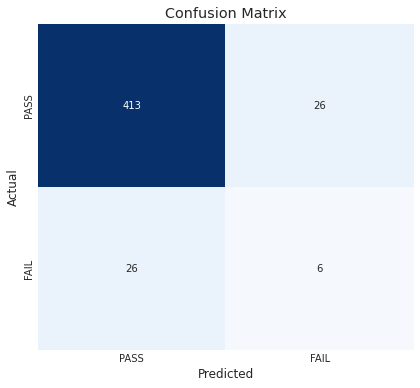

Classification Report:
----------------------
               precision    recall  f1-score   support

        PASS       0.94      0.94      0.94       439
        FAIL       0.19      0.19      0.19        32

    accuracy                           0.89       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.89      0.89      0.89       471



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test)

Training a Model (Imbalanced Classes)

In [ ]:
def evaluate_model(model, X_test, y_test):
    
    acc = model.score(X_test, y_test)
    print("Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=['PASS', 'FAIL'])
    clr = classification_report(y_test, y_pred, labels=['PASS', 'FAIL'])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.yticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

Accuracy: 88.96%


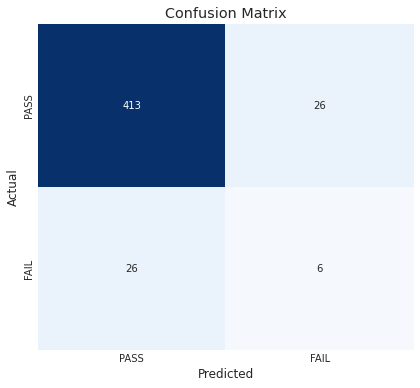

Classification Report:
----------------------
               precision    recall  f1-score   support

        PASS       0.94      0.94      0.94       439
        FAIL       0.19      0.19      0.19        32

    accuracy                           0.89       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.89      0.89      0.89       471



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test)

Random Oversampling

In [ ]:
oversampler = RandomOverSampler(random_state=1)
X_train_os, y_train_os = oversampler.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

PASS    1024
FAIL      72
Name: Pass/Fail, dtype: int64

Accuracy: 86.62%


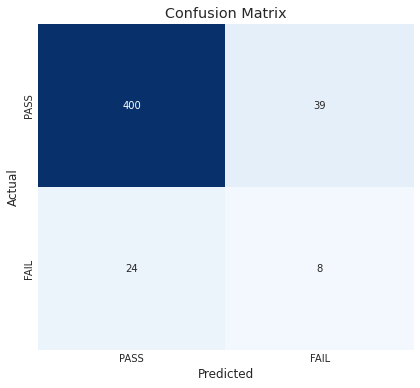

Classification Report:
----------------------
               precision    recall  f1-score   support

        PASS       0.94      0.91      0.93       439
        FAIL       0.17      0.25      0.20        32

    accuracy                           0.87       471
   macro avg       0.56      0.58      0.56       471
weighted avg       0.89      0.87      0.88       471



In [ ]:
model = LogisticRegression()
model.fit(X_train_os, y_train_os)

evaluate_model(model, X_test, y_test)

Oversampling With SMOTE

In [ ]:
oversampler = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

Accuracy: 85.77%


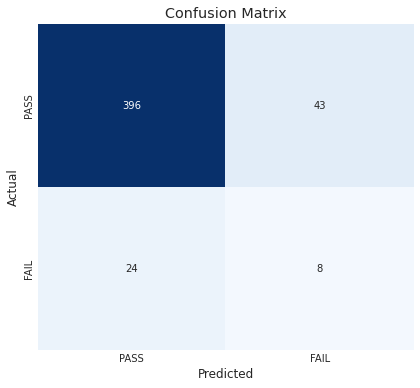

Classification Report:
----------------------
               precision    recall  f1-score   support

        PASS       0.94      0.90      0.92       439
        FAIL       0.16      0.25      0.19        32

    accuracy                           0.86       471
   macro avg       0.55      0.58      0.56       471
weighted avg       0.89      0.86      0.87       471



In [ ]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

evaluate_model(model, X_test, y_test)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [ ]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 92.99
Time consumed for training: 4.537
Time consumed for prediction: 0.01242 seconds


In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 92.78
Time consumed for training: 0.257 seconds
Time consumed for prediction: 0.00758 seconds
